Name: Lim Yu Yang Ian

Class: DAAA/FT/2A/02

Admin No: 2201874

___

# Importing modules

In [161]:
# Import Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Models
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDClassifier, LinearRegression, LogisticRegression, Ridge, ElasticNet, Lasso
from sklearn.compose import TransformedTargetRegressor
from sklearn.dummy import DummyRegressor

# Import Model Evaluation Tools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, cross_validate

#for saving models
import pickle

### Objective

To predict the price of a house based on the following attributes:

- City
- House Area (sqm)
- No. of toilets
- No. of bedrooms
- Stories
- Renovation Status

Background Information:

A house has many factors that determine it's value. There is the city, no. of toilets, stories, renovation status, and no. of bedrooms. Besides those in the dataset, there are other factors such as location within the city, ammenities surrouding, road access, traffic within the area, etc.

Additional Information:

"The value of every good in a market economy is based on a price discovery process. Producers and resellers propose hypothetical values and hope to find buyers with similar valuations. In contrast, consumers bid up or push down prices based on their changing interpretations of the value of goods. This process is imperfect and ever-changing.

For the real estate market, a buyer must value a property higher than the amount they are willing to trade for that property. At the same time, the seller must value the property at a price below the money offered. Of course, the supply and demand for a home in a given region will play into these economic evaluations, as well as the state of the broader economy in terms of GDP growth, unemployment, and inflation."

Investopedia. (n.d.). How the Real Estate Market Determines the Value of a Property. [online] Available at: https://www.investopedia.com/ask/answers/072915/how-market-value-determined-real-estate-market.asp.

In [162]:
random_state = 40

As data collection has already been carried out, we can skip the first step and move to exploring the data.

___

# Data observation

In [163]:
df = pd.read_csv("./ST1511 AIML-CA1-datasets/housing_dataset.csv")
original = df.copy()
df.head()

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000


There are no Null values as shown below. Thus no actions need to be taken to handle them.

In [164]:
df.isna().sum()

House ID             0
City                 0
House Area (sqm)     0
No. of Bedrooms      0
No. of Toilets       0
Stories              0
Renovation Status    0
Price ($)            0
dtype: int64

In [165]:
df.describe()

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($)
count,545.00000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,272.00000,515.054128,2.965138,1.286239,1.805505,4.766729e+05
std,157.47222,217.014102,0.738064,0.502470,0.867492,1.870440e+05
min,0.00000,165.000000,1.000000,1.000000,1.000000,1.750000e+05
25%,136.00000,360.000000,2.000000,1.000000,1.000000,3.430000e+05
50%,272.00000,460.000000,3.000000,1.000000,2.000000,4.340000e+05
75%,408.00000,636.000000,3.000000,2.000000,2.000000,5.740000e+05
max,544.00000,1620.000000,6.000000,4.000000,4.000000,1.330000e+06


As seen below, House area is a float, not an integer. This will need to be standardizes later on to allow for the model to train on this data with more ease.

Renovation Statu, and city is also not an integer, So encoding will need to be carried out to resolve this issue.

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB


In [167]:
display(df.value_counts("City"))
display(df.value_counts("No. of Bedrooms"))
display(df.value_counts("No. of Toilets"))
display(df.value_counts("Stories"))
display(df.value_counts("Renovation Status"))

City
New York    158
Seattle     134
Boston      105
Denver       89
Chicago      59
dtype: int64

No. of Bedrooms
3    300
2    136
4     95
5     10
1      2
6      2
dtype: int64

No. of Toilets
1    401
2    133
3     10
4      1
dtype: int64

Stories
2    238
1    227
4     41
3     39
dtype: int64

Renovation Status
semi-furnished    227
unfurnished       178
furnished         140
dtype: int64

In [168]:
sns.set_style("darkgrid")

Target variable is price

Below, I use a histplot to show the ditribution of Price

Text(0, 0.5, 'Count')

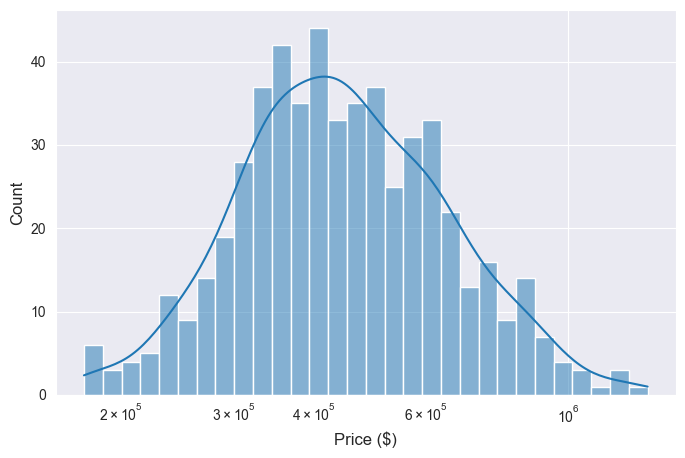

In [169]:
fig = plt.figure(figsize = (8,5))
sns.histplot(data=df, x="Price ($)", kde=True, log_scale=True, bins=30)

#  set labels
plt.xlabel("Price ($)", size=12)
plt.ylabel("Count", size=12)

Below, I use a KDEplot to compare the price distribution of houses in the different US cities.

Text(0, 0.5, 'Count')

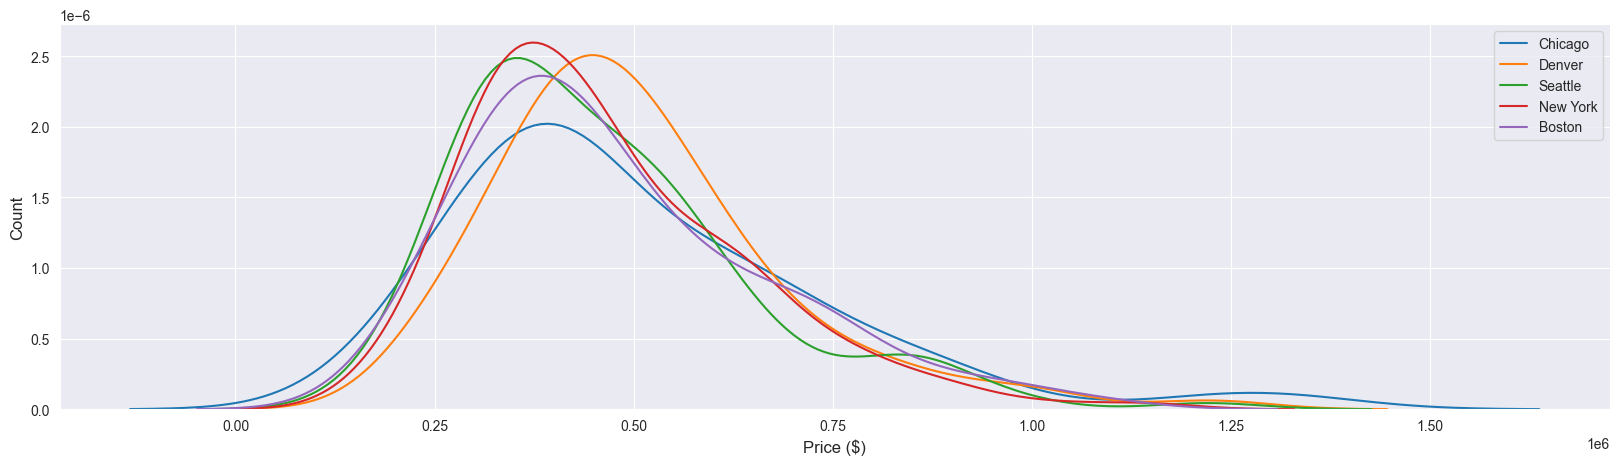

In [170]:
fig = plt.figure(figsize = (20,5))
for city in pd.unique(df["City"]):
    sns.kdeplot(data=df[df["City"] == city]["Price ($)"], label=city)

#  set labels
plt.legend()
plt.xlabel("Price ($)", size=12)
plt.ylabel("Count", size=12)

Here I use a histplot to plot the distribution of area sqm of houses.

Text(0, 0.5, 'Count')

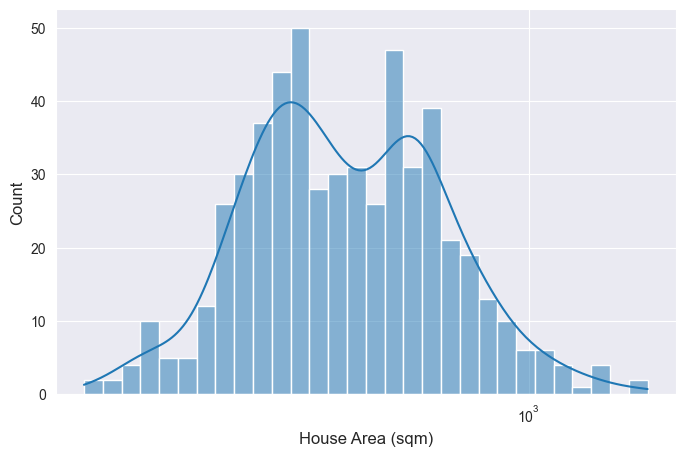

In [171]:
fig = plt.figure(figsize = (8,5))
sns.histplot(data=df, x="House Area (sqm)", kde=True, log_scale=True, bins=30)

#  set labels
plt.xlabel("House Area (sqm)", size=12)
plt.ylabel("Count", size=12)

Here I use KDEplot to plot the different Area of houses by city.

Text(0, 0.5, 'Count')

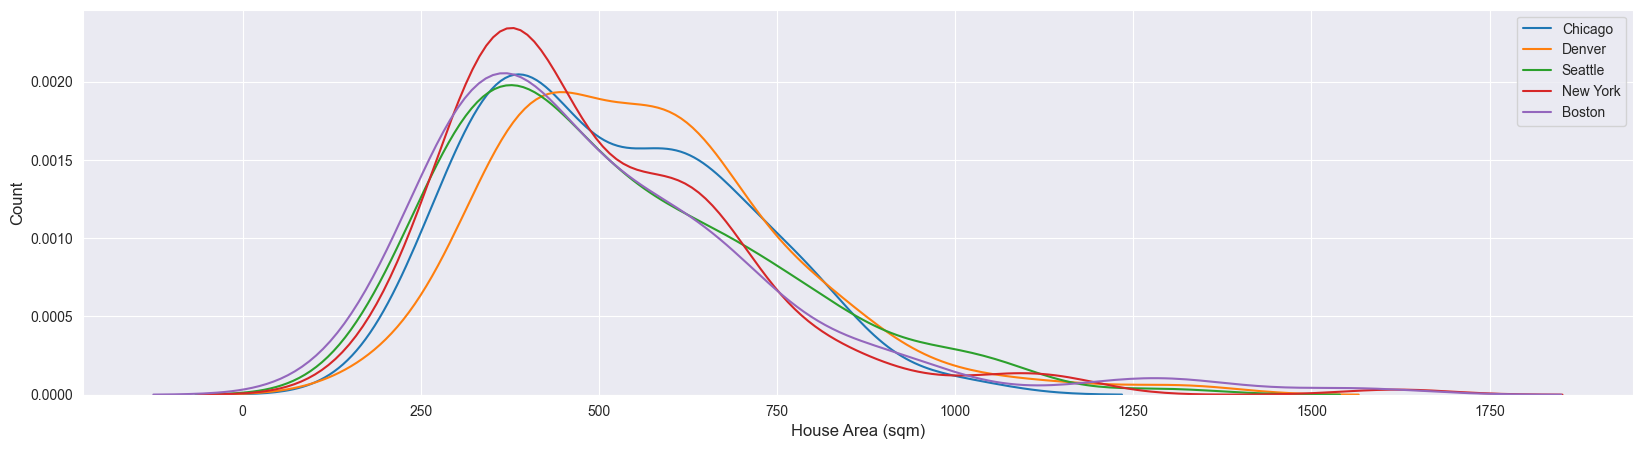

In [172]:
fig = plt.figure(figsize = (20,5))
for city in pd.unique(df["City"]):
    sns.kdeplot(data=df[df["City"] == city]["House Area (sqm)"], label=city)

#  set labels
plt.legend()
plt.xlabel("House Area (sqm)", size=12)
plt.ylabel("Count", size=12)

I use a countplot here to show the count of different Cities.

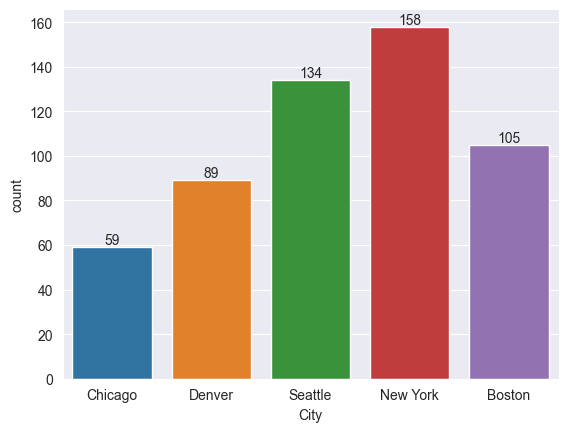

In [173]:
ax = sns.countplot(x = df["City"])
ax.bar_label(ax.containers[0])
plt.show()

I use a countplot to plot the number of each no of bedrooms per house.

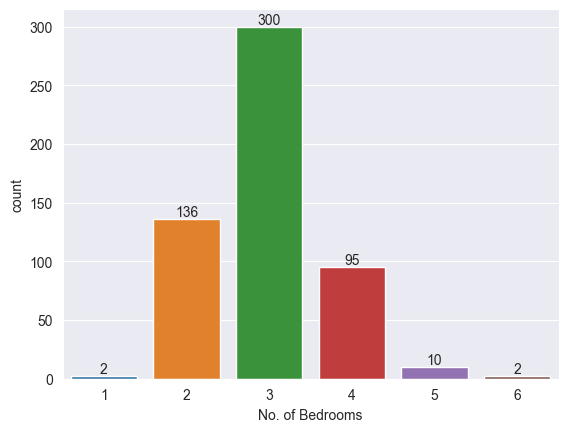

In [174]:
ax = sns.countplot(x = df["No. of Bedrooms"])
ax.bar_label(ax.containers[0])
plt.show()

I use countplot to show the number of each type of house based on the number of stories.

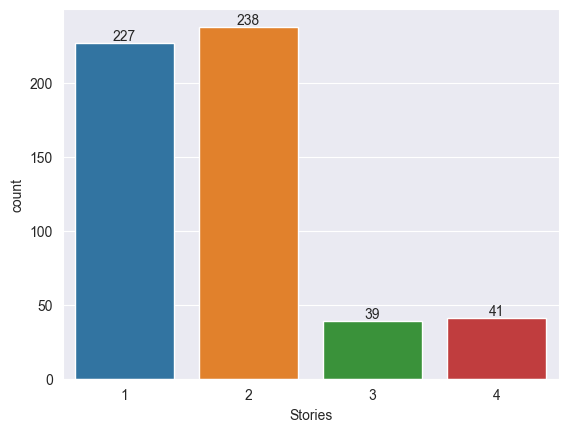

In [175]:
ax = sns.countplot(x = df["Stories"])
ax.bar_label(ax.containers[0])
plt.show()

I use countplot to show the number of houses based on their number of toilets.

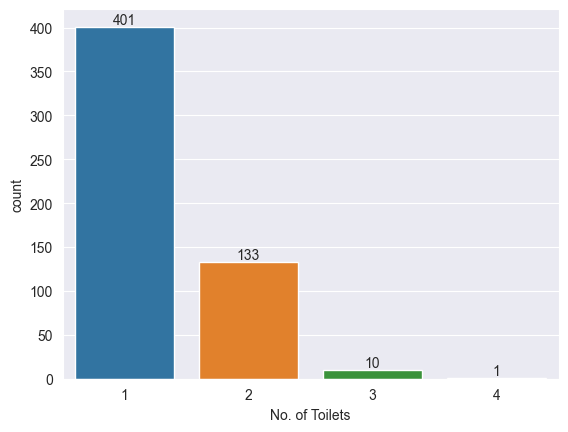

In [176]:
ax = sns.countplot(x = df["No. of Toilets"])
ax.bar_label(ax.containers[0])
plt.show()

I use countplot to show the number of houses based on their renovation status.

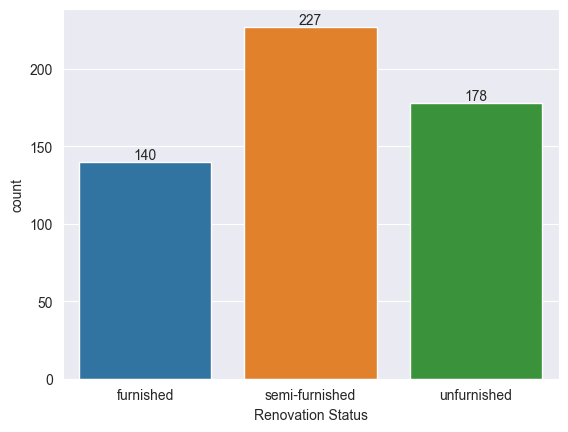

In [177]:
ax = sns.countplot(x = df["Renovation Status"])
ax.bar_label(ax.containers[0])
plt.show()

I use a heatplot to show the correlation between my variables in the dataset.

C:\Users\ianli_gu6oysd\AppData\Local\Temp\ipykernel_17892\2920371045.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')


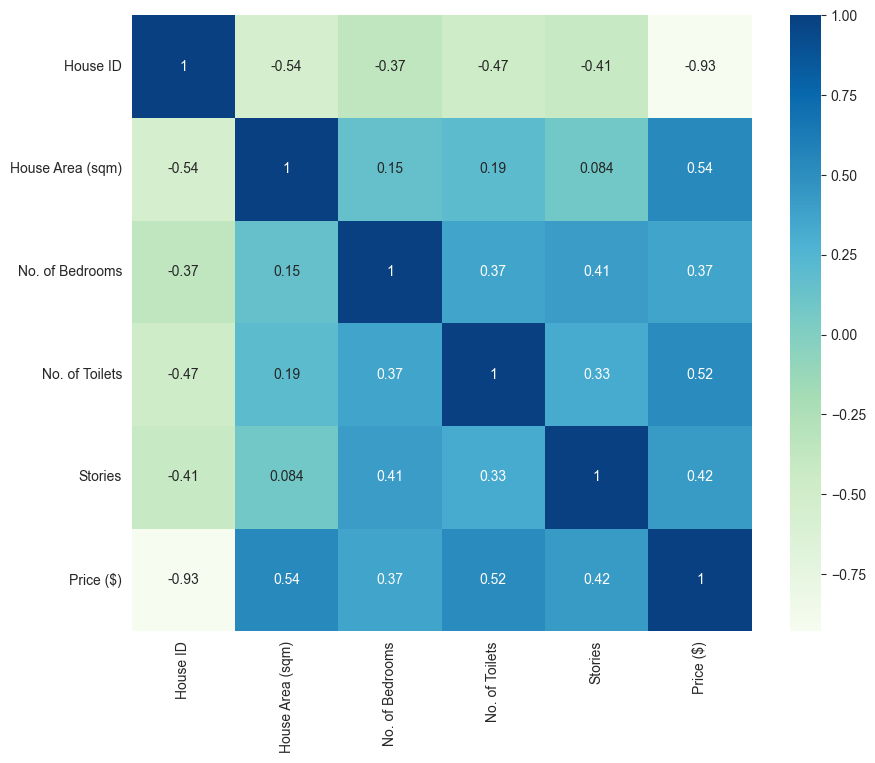

In [178]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')
plt.show()

___

# Feature Engineering

In [179]:
toilets_per_bedroom = []
for i, row in df.iterrows():
    number = row["No. of Bedrooms"] / row["No. of Toilets"]
    toilets_per_bedroom.append(number)

df["Toilets Per Bedroom"] = toilets_per_bedroom

In [180]:
X, y = df.drop(["Price ($)", "House ID"], axis=1), df["Price ($)"]

___

# Data preperation

### One Hot Encoding

As previously stated, City, and Renovation Status are not integers. Thus I use One Hot Encoding to resolve this issue, and allow my model to train on this important data.

In [181]:
hot_col = ["City", "Renovation Status"]
ohe = OneHotEncoder()
ohe.fit(X[hot_col])
X = pd.concat([
    X.drop(hot_col, axis=1).reset_index(drop=True),
    pd.DataFrame(
        ohe.transform(X[hot_col]).toarray(),
        columns=ohe.get_feature_names_out(),
    ),
],
axis=1)
display(X)

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Toilets Per Bedroom,City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle,Renovation Status_furnished,Renovation Status_semi-furnished,Renovation Status_unfurnished
0,742.0,4,2,3,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,896.0,4,4,4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,996.0,3,2,2,1.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,750.0,4,2,2,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,742.0,4,1,2,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,300.0,2,1,1,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
541,240.0,3,1,1,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
542,362.0,2,1,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
543,291.0,3,1,1,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


As previously said, House Area is not an integer, thus i need to standardise the data in order for the model to train on it better.

In [182]:
name_col = ["House Area (sqm)", "Toilets Per Bedroom"]
sc = StandardScaler()
X[name_col] = sc.fit_transform(X[name_col])
X.head()

,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Toilets Per Bedroom,City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle,Renovation Status_furnished,Renovation Status_semi-furnished,Renovation Status_unfurnished
0,1.046726,4,2,3,-0.629197,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.757010,4,4,4,-1.886822,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2.218232,3,2,2,-1.258010,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.083624,4,2,2,-0.629197,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.046726,4,1,2,1.886053,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Here I split my data with 70% to training, and 30% to testing data.

In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=random_state
)

print(X_train.shape)
print(X_test.shape)

(381, 13)
(164, 13)


___

# Training Models

In [184]:
scoring_methods = [
    "r2",
    "neg_root_mean_squared_error",
    "neg_mean_absolute_error",
    "neg_mean_absolute_percentage_error",
    "neg_mean_squared_error",
]
model_list = [
    LinearRegression(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    ExtraTreesRegressor(),
    Ridge(),
    ElasticNet(),
    Lasso(),
    HistGradientBoostingRegressor(),
    DummyRegressor()
]

In [185]:
score_list = []
for i in model_list:
    # fit a linear regression model to data
    model = TransformedTargetRegressor(regressor=i, func=np.log, inverse_func=np.exp)
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    scores = pd.Series(cross_validate(i, X_train, y_train, cv=10, scoring=scoring_methods, return_train_score=True, n_jobs=4)).apply(np.mean)
    score_list.append(scores)

In [186]:
scoring = pd.DataFrame(score_list, index=model_list)
display(scoring)

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_squared_error,train_neg_mean_squared_error
LinearRegression(),0.002493,0.002311,0.534014,0.598022,-116159.321443,-113854.688632,-88608.347743,-85992.376682,-0.200469,-0.194864,-1.386751e+10,-1.296798e+10
AdaBoostRegressor(),0.052388,0.004687,0.442510,0.663743,-126551.929724,-104130.263616,-94433.975970,-83411.259292,-0.224870,-0.203978,-1.629677e+10,-1.084695e+10
GradientBoostingRegressor(),0.054358,0.001995,0.468580,0.825338,-121982.854562,-75062.732512,-90041.825278,-55871.433634,-0.199776,-0.130836,-1.565421e+10,-5.638567e+09
RandomForestRegressor(),0.159174,0.007480,0.456176,0.928489,-123676.740236,-48034.851264,-90963.749773,-34602.402794,-0.203537,-0.077516,-1.585699e+10,-2.309143e+09
KNeighborsRegressor(),0.001895,0.002194,0.415862,0.625951,-131242.841697,-109853.458453,-94108.630000,-77206.013685,-0.210463,-0.172662,-1.785601e+10,-1.208597e+10
DecisionTreeRegressor(),0.002294,0.001695,0.030682,0.997469,-164728.229590,-8978.172588,-120619.381984,-1398.466404,-0.266116,-0.003627,-2.791957e+10,-8.117959e+07
ExtraTreesRegressor(),0.139080,0.008728,0.328479,0.997466,-138265.798377,-8982.720529,-99642.923895,-1406.813343,-0.220919,-0.003655,-1.966397e+10,-8.126692e+07
Ridge(),0.002094,0.001895,0.533387,0.596903,-116330.729333,-114012.954861,-88684.737111,-86111.109137,-0.200243,-0.194696,-1.388812e+10,-1.300399e+10
ElasticNet(),0.001995,0.001596,0.477612,0.521024,-124666.562519,-124283.830656,-94395.221759,-93004.125396,-0.218220,-0.215294,-1.595305e+10,-1.545008e+10
Lasso(),0.004787,0.001649,0.534019,0.598022,-116159.051377,-113854.690036,-88607.387426,-85992.286060,-0.200467,-0.194863,-1.386737e+10,-1.296798e+10


___

# Hyper Tuning

Since Ridge, Linear Regression, and Lasso have the highest Test R^2 value. I will be continueing with there 3 models and hyper tuning them.

In [187]:
parameters = {
    'fit_intercept': [True, False]
    }
clflr = GridSearchCV(LinearRegression(), parameters, n_jobs=-1, scoring="r2", cv=15, verbose=True)
searclr = clflr.fit(X_train, y_train)
searclr.best_score_

Fitting 15 folds for each of 2 candidates, totalling 30 fits


0.5072642842607508

In [193]:
parameters = {
    'alpha': [0.1, 1.0, 10.0], 
    "max_iter": np.round(np.linspace(1000, 15000, 500).astype(int))}
clfr = GridSearchCV(Ridge(), parameters, n_jobs=-1, scoring="r2", cv=15, verbose=True)
searchr = clfr.fit(X_train, y_train)
searchr.best_score_

Fitting 15 folds for each of 1500 candidates, totalling 22500 fits


0.5080037058606569

In [194]:
searchr.best_params_

{'alpha': 1.0, 'max_iter': 1000}

In [195]:
parameters = {
    'alpha': [0.1, 1.0, 10.0], 
    "max_iter": np.round(np.linspace(1000, 15000, 500).astype(int))
    }
clfl = GridSearchCV(Lasso(), parameters, n_jobs=-1, scoring="r2", cv=15, verbose=True)
searchl = clfl.fit(X_train, y_train)
searchl.best_score_

Fitting 15 folds for each of 1500 candidates, totalling 22500 fits


0.5073656963101991

The Ridge() model gives me the highest r^2 value. Thus I will export this as my chosen model

In [196]:
pickle.dump(clfr, open("Saved_models/Ridge CA1 Regression.p", "wb"))
clfgb = pickle.load(open("Saved_models/Ridge CA1 Regression.p", "rb"))

In [198]:
# CART Regression Tree
# load the boston datasets
dataset = df
# fit a Regression Tree model to the data
model = DummyRegressor()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print(mse)
print(model.score(X_test, y_test))

DummyRegressor()
41042738069.65451
-0.002177973683126444
